In [152]:
# 打开文件
with open('海洋/tao-all2.dat', 'r') as f:
    # 读取所有行
    lines = f.readlines()


ALLD = []
# 对于每一行
for line in lines:
    # 分割数据
    temp = line.split()
    # 打印数据
    # 数据转为浮点型，‘.’表示数据缺失，转为None
    ALLD.append([float(i) if i != '.' else None for i in temp])
# [1.0, 80.0, 3.0, 7.0, 800307.0, -0.02, -109.46, -6.8, 0.7, None, 26.14, 26.24]

# 判断 ALLD 中 第5，6 列  是否有缺失值
# for i in ALLD:
#     if i[5] is None or i[6] is None:
#         print(i)

# 提取 5，6列，如果为None就为0
data = [[i[5] if i[5] is not None else 0, i[6] if i[6] is not None else 0] for i in ALLD]
# 转为化numpy
import numpy as np
data = np.array(data)


# 提取 1，2，3列，其为 年 月 日，将其转化为连续的时间序列
# 其时间从80年3月7日开始，将所有时间数据转化为距离80年3月7日的天数
# 因为之后需要将其进行密度聚类，所以需要将时间转化为连续的时间序列
time = []
for i in ALLD:
    time.append((i[1]-80)*365 + (i[2]-3)*30 + i[3]-7)
time = np.array(time)
# 将其中time 全部乘 
time = time
# 合并 time 和 data
OUT = np.c_[data,time]
print(OUT.shape)




# 筛选数据
# 只保存其第一维度大于100 第二维度在正负2.5之间
# OUT = OUT[OUT[:,1] > 100]
# OUT = OUT[OUT[:,0] > -1.5]
# OUT = OUT[OUT[:,0] < 2.5]
# print(OUT.shape)


# 最小-最大归一化
def min_max_normalization(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

# Z-Score标准化
def z_score_normalization(data):
    return (data - np.mean(data)) / np.std(data)

# 对数据的第一二列进行归一化
data = OUT[:,:2]
# 用最小-最大归一化和Z-Score标准化方法对数据进行归一化
# 使用最小-最大归一化和Z-Score标准化方法对数据进行归一化后，数据的分布和相对大小关系不会改变，但是数据的尺度（scale）会发生变化：
# 最小-最大归一化：这种方法将原始数据线性转换到[0,1]范围，转换公式为：(x - min) / (max - min)。其中min和max分别是数据的最小值和最大值。这种方法的结果是，所有的数据都被压缩到0和1之间，最小值变为0，最大值变为1。
# Z-Score标准化：这种方法将原始数据转换为标准正态分布，转换公式为：(x - mean) / std。其中mean是数据的平均值，std是数据的标准差。这种方法的结果是，所有的数据的平均值变为0，标准差变为1。
# 这两种方法都可以消除不同特征之间的量纲和尺度差异，使得数据更适合用于机器学习算法。但是，它们也有一些缺点：最小-最大归一化对异常值非常敏感，一旦数据中存在异常值，就会导致归一化的结果失真；Z-Score标准化则假设数据服从正态分布，如果数据的实际分布远离正态分布，那么归一化的效果可能不佳。
data = min_max_normalization(data)
data = z_score_normalization(data)

# data 乘1000
data = data * 1000

print(data)


# 计算第一维 和 第二维 的平均差异
# 计算第一维的平均值
mean1 = np.mean(data[:,0])
# 计算第二维的平均值
mean2 = np.mean(data[:,1])
print(mean1,mean2)

# 合并data 第一二列 和 OUT的第三列
data = np.c_[data,OUT[:,2]]
print(data.shape)
OUT = data

(178080, 3)
[[  268.70669737  -830.39169118]
 [  268.70669737  -830.39169118]
 [  268.70669737  -830.39169118]
 ...
 [  358.79179007 -1140.51740608]
 [  358.89221938 -1140.41697677]
 [  358.79179007 -1140.41697677]]
273.66414434997466 -273.6641443499751
(178080, 3)


C:\Users\quezi\AppData\Local\Temp\ipykernel_17956\4125051216.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('jet', 60)


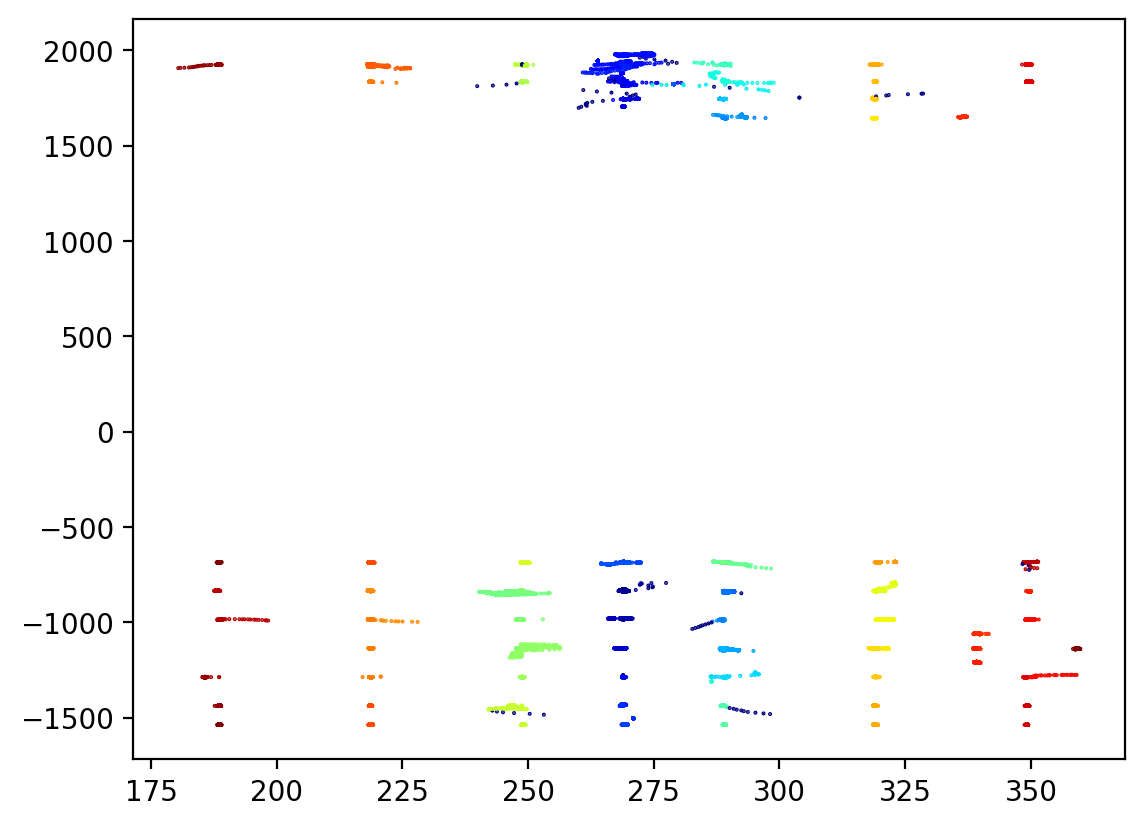

{1: 582, 5: 658, 7: 2562, 9: 649, 10: 713, 11: 706, 14: 872, 16: 739, 18: 1427, 19: 430, 22: 473, 23: 500, 24: 1375, 25: 1684, 26: 724, 31: 852, 33: 1215, 34: 2517, 39: 1060, 42: 493, 44: 1108, 47: 512, 48: 731, 49: 639, 51: 703, 53: 510, 56: 2289, 58: 802, 60: 1468, 63: 653, 64: 451, 66: 449, 69: 777, 72: 1372, 73: 611, 75: 591, 76: 459, 77: 806, 79: 1439, 80: 782, 84: 1115, 85: 718, 86: 1229, 94: 507, 95: 1450, 98: 635, 99: 732, 110: 1244, 111: 500, 112: 400, 128: 892, 131: 640, 142: 2742, 144: 861, 146: 919, 147: 1412, 164: 878, 165: 2317, 167: 2419, 168: 391, 172: 541, 174: 1296, 175: 734, 178: 643, 179: 1160, 181: 449, 183: 1513, 191: 2612, 193: 604, 194: 1103, 196: 1800, 198: 1855, 201: 502, 204: 667, 205: 667, 206: 1016, 207: 665, 211: 926, 212: 1023, 221: 1132, 222: 1434, 225: 906, 226: 476, 227: 600, 230: 2531, 233: 771, 234: 1278, 236: 761, 237: 2846, 238: 1837, 241: 1773, 242: 1015, 243: 491, 249: 2336, 251: 616, 252: 733, 253: 491, 254: 729, 255: 2791, 256: 2520, 257: 595, 

In [159]:
# 密度聚类
from sklearn.cluster import DBSCAN
# 聚类
# 0.27*0.27*0.27 = 0.02
dbscan = DBSCAN(eps=5.8, min_samples=4)
dbscan.fit(OUT)
# 聚类结果
import matplotlib.pyplot as plt

# 创建一个新的图像，设置分辨率为200
plt.figure(dpi=200)




import matplotlib.pyplot as plt
import matplotlib.cm as cm

# 创建一个颜色映射
cmap = cm.get_cmap('jet', 60)

# 绘制散点图，使用颜色映射
plt.scatter(OUT[:, 0], OUT[:, 1], c=dbscan.labels_, cmap=cmap, s=0.2)

plt.show()


a = {}
for i in dbscan.labels_:
    if i not in a:
        a[i] = 1
    else:
        a[i] += 1

# 对于每一个分类，其数值低于100删除
delList = []
for i in a:
    if a[i] <  390:
        delList.append(i)

for i in delList:
    del a[i]

print(a)
print(len(a))
print(dbscan.labels_)
# 根据elnino 可知 
# 有59个分类，期望得到的分类数为60
